# petits graphiques en bas

# Bilan de ce que j'ai fait dans ces deux fonctions : 

### traiter_donnees(df) : 
prend le dataframe tout sale que tu prends en csv via [open data parisØ](https://opendata.paris.fr/explore/dataset/comptages-routiers-permanents/export/?disjunctive.libelle&disjunctive.etat_trafic&disjunctive.libelle_nd_amont&disjunctive.libelle_nd_aval&sort=t_1h&refine.t_1h=2023&q=washington&q.timerange.t_1h=t_1h:%5B2016-12-31T23:00:00Z+TO+2023-12-31T22:59:59Z%5D&refine.libelle=AV_Champs_Elysees)  
et renvoie le dataframe avec les dates en index pour bien tracer et sans utc et garde que les colonnes utiles

### plot_daily_mean() : 
assez clair j'crois, faut mettre que des colonnes numériques pour que la conversion en moyenne par jour marche (donc pas etat arc, ni libelle)

## valeurs manquantes : 

ratio de valeurs manquantes en 2023 pour le taux d'occupation: 0.016755521706016754

ratio de valeurs manquantes en 2023 pour le débit horaire: 0.014597613607514598

heures manquantes : 137 
(J'ai pas regardé où)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def traiter_donnees(df): #bilan de ce qu'on a fait au dessus, sans prendre en compte l'état de l'arc pour l'instant

    #tri par date
    df = df.sort_values(by=['Date et heure de comptage'], ascending=True)

    #on garde que les colonnes qui nous intéressent
    colonnes_a_garder = ['Libelle', 'Date et heure de comptage','Taux d\'occupation', 'Etat arc', 'Débit horaire']
    df = df.loc[:,colonnes_a_garder]

    #renommer les colonnes pour que ce soit pratique
    df = df.rename(columns={'Date et heure de comptage': 'timestamp', 'Taux d\'occupation': 'taux_occupation', 'Etat arc': 'etat_arc', 'Débit horaire': 'debit_horaire'})

    #jsplus pk j'ai fait ça
    df.reset_index(drop=True, inplace=True)

    df['timestamp'] = pd.to_datetime(df['timestamp'], utc = True)
    df['timestamp'] = df['timestamp'].dt.tz_convert('Europe/Paris')
    df['timestamp'] = df['timestamp'].dt.tz_localize(None)
    df.set_index('timestamp', inplace=True)
    return df


In [ ]:
def plot_daily_mean(df, column, title):
    daily_mean = df.loc[:,[column]].resample('D').mean()
    fig, ax = plt.subplots()
    ax.plot(daily_mean.index, daily_mean[column], label=column)
    ax.set_xlabel("Date")
    ax.set_title(title)
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()

j'ai un peut tout fait dans l'ordre qui suit, y a pas grand chose à regarder

In [11]:
champs_2023_df = pd.read_csv('../data/csv/champs/champs_2023.csv', delimiter=';')

FileNotFoundError: [Errno 2] No such file or directory: '../data/csv/champs/champs_2023.csv'

In [10]:
champs_2023_df_arc_191 = champs_2023_df.loc[champs_2023_df['Identifiant arc'] == 191]

NameError: name 'champs_2023_df' is not defined

In [5]:
champs_2023_df_traite = traiter_donnees(champs_2023_df)

In [7]:
champs_2023_df_traite.iloc[:3]

,Libelle,taux_occupation,etat_arc,debit_horaire
timestamp,,,,
2023-01-01 00:00:00,AV_Champs_Elysees,NaN,Barré,3.0
2023-01-01 01:00:00,AV_Champs_Elysees,NaN,Barré,116.0
2023-01-01 02:00:00,AV_Champs_Elysees,34.44445,Invalide,534.0


In [9]:
champs_2023_df_traite.iloc[-3:-1]

,Libelle,taux_occupation,etat_arc,debit_horaire
timestamp,,,,
2023-11-30 22:00:00,AV_Champs_Elysees,20.40723,Invalide,1069.0
2023-11-30 23:00:00,AV_Champs_Elysees,16.66334,Invalide,950.0


In [15]:
heures_missing = 24*334 - len(champs_2023_df_traite) -1 #changement d'heure d'été
heures_missing

137

In [6]:
champs_2023_df.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2023-02-01T23:00:00+01:00,764.0,11.28000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
1,4264,AV_Champs_Elysees,2023-02-01T22:00:00+01:00,819.0,16.52056,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
2,4264,AV_Champs_Elysees,2023-02-01T20:00:00+01:00,1082.0,19.98722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
3,4264,AV_Champs_Elysees,2023-02-01T18:00:00+01:00,1027.0,23.27334,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
4,4264,AV_Champs_Elysees,2023-10-04T06:00:00+02:00,364.0,4.13500,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,1996-10-10,2023-01-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."


C'est le bordel niveau dates au début

In [7]:
champs_2023_df_sorted = champs_2023_df.sort_values(by=['Date et heure de comptage'], ascending=True)

In [11]:
champs_2023_df_sorted.iloc[0:3]

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
7727,4264,AV_Champs_Elysees,2023-01-01T00:00:00+01:00,3.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
7678,4264,AV_Champs_Elysees,2023-01-01T01:00:00+01:00,116.0,NaN,Inconnu,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Barré,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
7679,4264,AV_Champs_Elysees,2023-01-01T02:00:00+01:00,534.0,34.44445,Saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."


In [10]:
types_d_etats = champs_2023_df_sorted['Etat arc'].unique()
types_d_etats

array(['Barré', 'Invalide'], dtype=object)

In [176]:
colonnes_a_garder = ['Libelle', 'Date et heure de comptage','Taux d\'occupation', 'Etat arc', 'Débit horaire']
champs_2023_df_sorted_reduced = champs_2023_df_sorted.loc[:,colonnes_a_garder]

In [177]:
champs_2023_df_sorted_reduced = champs_2023_df_sorted_reduced.rename(columns={'Date et heure de comptage': 'timestamp', 'Taux d\'occupation': 'taux_occupation', 'Etat arc': 'etat_arc', 'Débit horaire': 'debit_horaire'})


In [178]:
# Clean index

champs_2023_df_sorted_reduced.reset_index(drop=True, inplace=True)


In [179]:
#drop l'utc pour tracer les courbes

champs_2023_df_sorted_reduced['timestamp'] = pd.to_datetime(champs_2023_df_sorted_reduced['timestamp'], utc = True)
champs_2023_df_sorted_reduced['timestamp'] = champs_2023_df_sorted_reduced['timestamp'].dt.tz_convert('Europe/Paris')
champs_2023_df_sorted_reduced['timestamp'] = champs_2023_df_sorted_reduced['timestamp'].dt.tz_localize(None)


In [186]:
#check passage à l'heure d'été car on veut quand même garder les données par rapport aux heures réelles
champs_2023_df_sorted_reduced.iloc[2003:2007]

,Libelle,timestamp,taux_occupation,etat_arc,debit_horaire
2003,AV_Champs_Elysees,2023-03-26 00:00:00,15.43722,Invalide,974.0
2004,AV_Champs_Elysees,2023-03-26 01:00:00,15.90278,Invalide,942.0
2005,AV_Champs_Elysees,2023-03-26 03:00:00,NaN,Invalide,NaN
2006,AV_Champs_Elysees,2023-03-26 04:00:00,6.17111,Invalide,544.0


In [182]:
champs_2023_df_sorted_reduced.iloc[:3]

,Libelle,timestamp,taux_occupation,etat_arc,debit_horaire
0,AV_Champs_Elysees,2023-01-01 00:00:00,NaN,Barré,3.0
1,AV_Champs_Elysees,2023-01-01 01:00:00,NaN,Barré,116.0
2,AV_Champs_Elysees,2023-01-01 02:00:00,34.44445,Invalide,534.0


In [184]:
ratio_nan_taux_occupation = champs_2023_df_sorted_reduced['taux_occupation'].isna().mean()
ratio_nan_debit_horaire = champs_2023_df_sorted_reduced['debit_horaire'].isna().mean()
print(f'ratio de valeurs manquantes pour le taux d\'occupation: {ratio_nan_taux_occupation}')
print(f'ratio de valeurs manquantes pour le débit horaire: {ratio_nan_debit_horaire}')

ratio de valeurs manquantes pour le taux d'occupation: 0.016755521706016754
ratio de valeurs manquantes pour le débit horaire: 0.014597613607514598


In [195]:
daily_mean0 = champs_2023_df_sorted_reduced.loc[:,['taux_occupation', 'debit_horaire']].resample('D').mean()


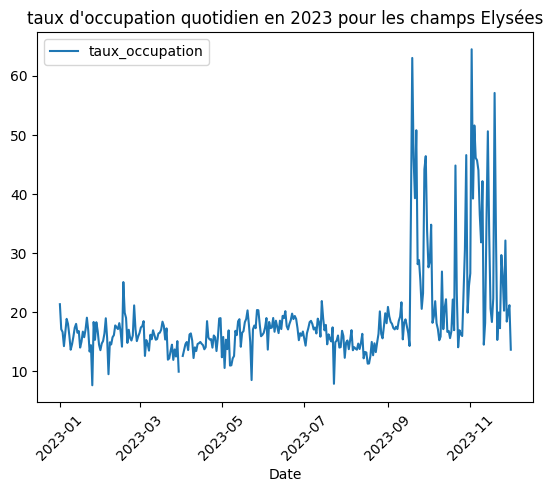

In [199]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the residual_solar and residual_onwind columns
ax.plot(daily_mean0.index, daily_mean0["taux_occupation"], label="taux_occupation")


# Set the x-axis label and title
ax.set_xlabel("Date")
ax.set_title("taux d'occupation quotidien en 2023 pour les champs Elysées")

# Add a legend
ax.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

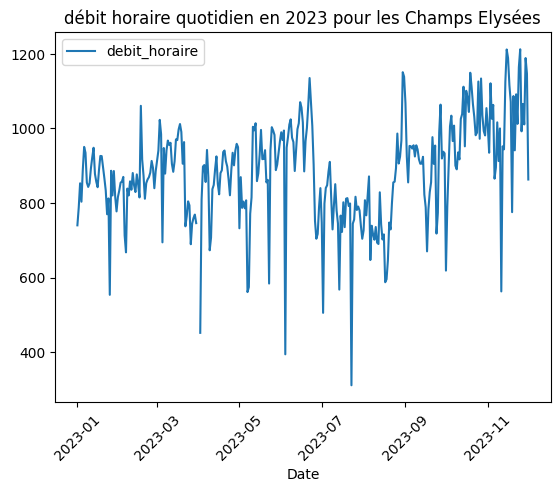

In [198]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the residual_solar and residual_onwind columns
ax.plot(daily_mean0.index, daily_mean0["debit_horaire"], label="debit_horaire")


# Set the x-axis label and title
ax.set_xlabel("Date")
ax.set_title("débit horaire quotidien en 2023 pour les Champs Elysées")

# Add a legend
ax.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()